<div style="text-align: right"> 01.01.2022</div>

***Name: Maira Scheumann*** 

# Hausaufgabe Blatt 7

## Pendel: Energie

In dieser Aufgabe werden wir erneut die Bewegungsgleichung eines Pendels numerisch lösen und dabei dieses mal die Energie des Systems betrachten. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Die nach dem Euler Verfahren diskretisierte Gleichungen lauten:

\begin{align*}
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{1} \\
        \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + 
        \omega\left(t\right) \cdot \Delta t \tag{2}
\end{align*}

Die potentielle Energie $E_p$ und die kinetische Energie $E_{kin}$ sind gegeben durch:
\begin{align*}
E_p &= m \cdot g \cdot L \left( 1 - \cos \varphi \right) \\
E_{kin} &= \frac{m}{2} v^2 = \frac{m}{2}L^2 \dot \varphi ^2
\end{align*}

Die konstante Gesamtenergie ist durch die potentielle Energie bei anfänglicher Auslenkung $\varphi_0$ gegeben
\begin{align*}
E = m \cdot g \cdot L\left(1-\cos \varphi_0\right). \tag{3}
\end{align*}



### 1. Numerische Integration
Auf Blatt 6 haben Sie die Pendelgleichungen (1 + 2) numerisch integriert. Der Code dafür steht in der folgenden Zelle. Führen Sie diesen aus, bevor Sie bei "2. Energie" weiterarbeiten. Hier haben wir $N=2000$ Zeitschritte, wobei $\Delta t=0.004$, $\omega(t=0)=0$ und $\varphi_0 = \varphi(t=0)=\pi/4$ sein soll. Die Länge des Pendels ist $L=1$, die Masse $m=1$ und $g$ die Erdbeschleunigung.  


In [2]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 2000 # Anzahl Zeitschritte

dt = 0.004 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N+1) # Zeit
resultsw = [0] # Liste für berechnete Winkelgeschwindigkeit
resultsphi = [np.pi/4] # Liste für berechnete Winkel


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    wtemp = w # Zwischenspeichern der Winkelgeschwindigkeit, damit phi nicht mit dem aktualisierten omega berechnet wird
    w = w - g/L*np.sin(phi)*dt # update omage
    resultsw.append(w) # speichere omega
    phi = phi+wtemp*dt # update phi
    resultsphi.append(phi) # speichere phi

## 2. Energie
**a)** Schreiben Sie eine Funktion, die Ihnen die potentielle, kinetische und gesamte Energie abhängig vom Winkel $\varphi$ und der Winkelgeschwindigkeit $\omega$ berechnet und zurück gibt.

In [3]:
phi0 = (np.pi/4) #anfängliche Auslenkung

def Ep(phi): #pot. Energie definiert
    Ep=m*g*L*(1-np.cos(phi))
    return Ep
def Ekin(w): #kin. Energie definiert
    Ekin=m/2*L**2*w**2
    return Ekin
def E(phi, w): #Gesamtenergie definiert
    E=Ep+Ekin
    return E

Ep_l = [] #Liste pot. Energie
Ekin_l = [] #Liste kin. Energie
E_l = [] #Liste Gesamtenergie

for i in resultsphi: #Einträge für pot. Energie
    Ep1 = Ep(i)
    Ep_l.append(Ep1)
    
for j in resultsw: #Einträge für kin. Energie
    Ekin1 = Ekin(j)
    Ekin_l.append(Ekin1)

E_l = [i + j for i, j in zip(Ep_l, Ekin_l)] #Einträge für Gesamtenergie

**b)** Plotten Sie die kinetische, potentielle und gesamte Energie gegen die Zeit. Vergleichen Sie das Ergebnis mit der erwarteten gesamten Energie (Gleichung (3)). Warum sehen Sie eine Abweichung?

Benutzen Sie zum plotten einer horizontalen Linie `ax.hlines(value, xStart, xEnd)`, wobei `value` der y-Wert und `xStart` und `xEnd` die Anfangs- und End-Punkte der Linie sind.

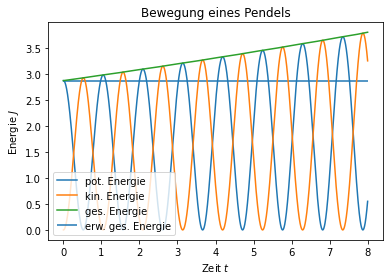

In [4]:
import matplotlib.pyplot as plt #lade Bibliothek

t = np.arange(0, 8.004, 0.004) #Zeitwerte

fig, ax = plt.subplots()

ax.set_title("Energie eines Pendels")  #Titel
ax.plot(t, Ep_l, label='pot. Energie') #Graph pot. Energie
ax.plot(t, Ekin_l, label='kin. Energie') #Graph kin. Energie
ax.plot(t, E_l, label='ges. Energie') #Graph Gesamtenergie
ax.hlines(m*g*L*(1-np.cos(phi0)), 0, 8.004, label='erw. ges. Energie') #Linie erwartete Gesamtenergie
ax.set_xlabel("Zeit $t$") #Achsenbeschriftungen
ax.set_ylabel("Energie $J$")

plt.legend(loc=3) #Legende unten links wird angezeigt
plt.show()

#Die Abweichung ergibt sich aufgrund des Euler-Verfahren, da dies nur eine Annäherung ist.